In [ ]:
import csv

In [ ]:
# pip install dill
# import dill
# dill.load_session('notebook_env.db')

# Code for generating symmetric character table

In [ ]:

n = 6
partitions = list(Partitions(n))
num_partitions = len(partitions)

#rearranging partitions so that partitions[num_partitions - 1 - i].conjugate = partitions[i]
for i in range(num_partitions) : 
    partitions[i] = Partition(partitions[num_partitions - 1 - i]).conjugate()

m = matrix([[symmetrica.charvalue(irred, cls) for cls in partitions] for irred in partitions])

In [ ]:
partitions

[[6],
 [5, 1],
 [4, 2],
 [3, 3],
 [4, 1, 1],
 [3, 2, 1],
 [3, 1, 1, 1],
 [2, 2, 2],
 [2, 2, 1, 1],
 [2, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1]]

In [ ]:
col_header_string = str(partitions[0])
for i in range(1, num_partitions) : 
    col_header_string +=  ' & ' + str(partitions[i])
col_header_string

'[6] & [5, 1] & [4, 2] & [3, 3] & [4, 1, 1] & [3, 2, 1] & [3, 1, 1, 1] & [2, 2, 2] & [2, 2, 1, 1] & [2, 1, 1, 1, 1] & [1, 1, 1, 1, 1, 1]'

# Code for finding the character tables mod 4,5,7,9 & plots


In [ ]:
num_symm_groups = 27
# function that returns a character table for S_n whose rows are symmetric about the center, mod 4
def nth_symm_chartable(n) : 
    partitions = list(Partitions(n))
    num_partitions = len(partitions)

    for i in range(num_partitions) : 
        partitions[i] = Partition(partitions[num_partitions - 1 - i]).conjugate()

    return matrix(ZZ, [[symmetrica.charvalue(irred, cls) for cls in partitions] for irred in partitions])

char_table_list = []
for n in range(1, num_symm_groups) : 
    char_table_list.append(nth_symm_chartable(n))

In [ ]:
# residue calculator returns the list of the numbers 
def residue_calculator(n, m) : 
  A = matrix(ZZ.quotient(m), char_table_list[n - 1]) 
  num_entries = len(A.columns())**2 
  residues_list = [0 for i in range(m)] 
  count = 0 
  for j in A : 
      for k in j : 
          residues_list[k] += 1
  for i in range(m) : 
    residues_list[i] = residues_list[i] / num_entries
  return residues_list 

proportions_list = []

# fills the residues list - each item of the list, from n = 1 to n = num_symm_groups
for n in range(1, num_symm_groups) : 
  single_prop_list = []
  for m in [4,5,6,7,8,9] :
#   for m in [4] :
    single_prop_list.append(residue_calculator(n, m))
  proportions_list.append(single_prop_list)


In [ ]:
proportions_list

[[[0, 1, 0, 0],
  [0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 3/4, 0, 1/4],
  [0, 3/4, 0, 0, 1/4],
  [0, 3/4, 0, 0, 0, 1/4],
  [0, 3/4, 0, 0, 0, 0, 1/4],
  [0, 3/4, 0, 0, 0, 0, 0, 1/4],
  [0, 3/4, 0, 0, 0, 0, 0, 0, 1/4]],
 [[1/9, 5/9, 1/9, 2/9],
  [1/9, 5/9, 1/9, 0, 2/9],
  [1/9, 5/9, 1/9, 0, 0, 2/9],
  [1/9, 5/9, 1/9, 0, 0, 0, 2/9],
  [1/9, 5/9, 1/9, 0, 0, 0, 0, 2/9],
  [1/9, 5/9, 1/9, 0, 0, 0, 0, 0, 2/9]],
 [[4/25, 2/5, 2/25, 9/25],
  [4/25, 2/5, 2/25, 2/25, 7/25],
  [4/25, 2/5, 2/25, 2/25, 0, 7/25],
  [4/25, 2/5, 2/25, 2/25, 0, 0, 7/25],
  [4/25, 2/5, 2/25, 2/25, 0, 0, 0, 7/25],
  [4/25, 2/5, 2/25, 2/25, 0, 0, 0, 0, 7/25]],
 [[12/49, 22/49, 4/49, 11/49],
  [12/49, 3/7, 1/49, 2/49, 13/49],
  [11/49, 20/49, 1/49, 0, 4/49, 13/49],
  [10/49, 20/49, 1/49, 0, 2/49, 4/49, 12/49],
  [10/49, 20/49, 1/49, 0, 2/49, 2/49, 3/49, 11/49],
  [10/49, 20/49, 1/49, 0, 2/49, 2/49, 1/49, 2/49, 11/49]],
 [[30/121, 49/12

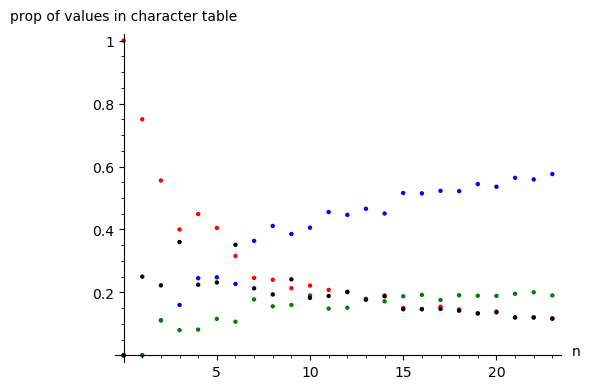

In [ ]:
# calculates the residues for m = 4, up to n = 24
n = 24
m = 4

# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)])
P1 = points([(i,  proportions_list[i][m - 4][1]) for i in range(n)], color = 'red')
P2 = points([(i,  proportions_list[i][m - 4][2]) for i in range(n)], color = 'green')
P3 = points([(i,  proportions_list[i][m - 4][3]) for i in range(n)], color = 'black')
P = P0 + P1 + P2 + P3
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1)

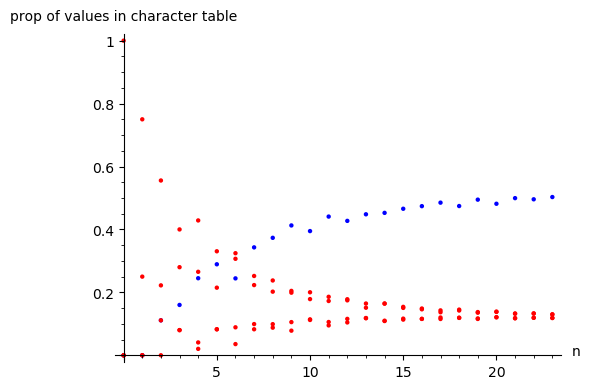

In [ ]:
# calculates the residues for m = 5, up to n = 24
n = 24
m = 5
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'blue')
P = P0
# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

for j in range(1, m) : 
  P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(n)], color = 'red')
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1)

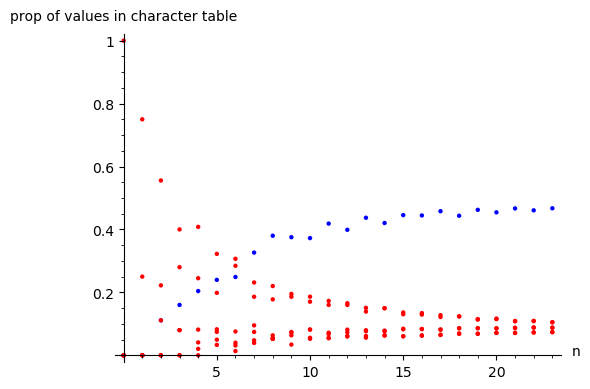

In [ ]:
# calculates the residues for m = 7, up to n = 24
n = 24
m = 7
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'blue')
P = P0
# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

for j in range(1, m) : 
  P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(n)], color = 'red')
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1)

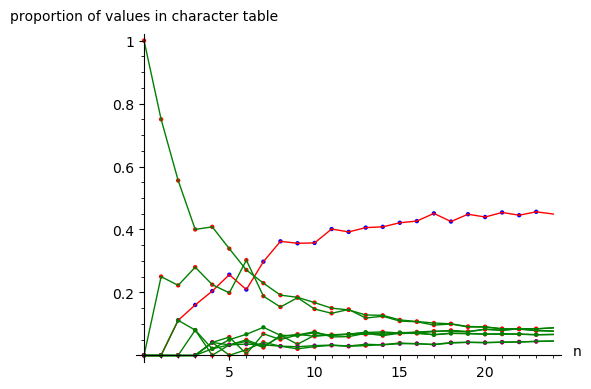

In [ ]:
# calculates the residues for m = 9, up to n = 24
n = 24
m = 9
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'blue')
P = P0

# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

for j in range(1, m) : 
  if j == 2 or j == 5: 
    "rip the finagling"
  else : 
    P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(n)], color = 'red')
    
# this is 3 mod 9 
P = P + points([(i,  proportions_list[i][m - 4][2]) for i in range(n)], color = 'green')

# this is 6 mod 9 
P = P + points([(i,  proportions_list[i][m - 4][5]) for i in range(n)], color = 'purple')

var('a,b')
model(x) = a*x+b

for i in range(m) : 
  for j in range(n) :
    if i == 0 : 
      P = P + line([(j, proportions_list[j][m - 4][i]), (j + 1, proportions_list[j + 1][m - 4][i])], color = 'red')
    else : 
      P = P + line([(j, proportions_list[j][m - 4][i]), (j + 1, proportions_list[j + 1][m - 4][i])], color = 'green')

P.show(axes_labels = ("n", "proportion of values in character table"), axes_labels_size = 1)

# Me screwing around with trying to save the character tables

In [ ]:
import dill

In [ ]:
# writes the char_table_list to a csv file 
C = char_table_list
  with open("n_symm_character_table" + ".csv", 'w') as f:
            c = csv.writer(f)
            c.writerows(C)

In [ ]:
latex([list(i) for i in partitions])

In [ ]:
latex(matrix(ZZ.quotient(3), char_table_list[6 - 1]))

# Function for sorting columns of matrices identical mod m

In [ ]:
# returns true if col1 and col2 of the nth symmetric character table 
def mod_column_equivalence(n, m, col1, col2) :
  A = matrix(ZZ.quotient(m), char_table_list[n - 1]) 
  return A.columns()[col1] == A.columns()[col2]

#examples
